<a href="https://colab.research.google.com/github/SantiagoMB21/analisis-exploratorio/blob/main/TallerAnalisisBivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Bivariado Datos Tringa flavipes**
Este análisis bivariado se enfoca en explorar la relación entre la cantidad de observaciones de Tringa flavipes (Lesser Yellowlegs) y la precipitación mensual registrada en Colombia para el año 2020. Siguiendo un flujo estructurado, primero se realiza una exploración inicial de los datos para comprender su estructura y distribución. Luego, se llevan a cabo pasos de preprocesamiento para limpiar los datos y asegurar su consistencia. A continuación, se analizan las variables clave a través de gráficos y medidas estadísticas, identificando patrones y posibles valores atípicos. Finalmente, se examina la relación entre las variables mediante un análisis de correlación y visualizaciones como gráficos de dispersión y diagramas de caja, proporcionando una visión clara de cómo la precipitación puede influir en la cantidad de observaciones de esta especie.


# 1. entendiendo los datos

In [17]:
# Cargar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Establecer configuraciones de visualización
rcParams['figure.figsize'] = (12, 6)

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Análisis exploratorio de datos/Datos_con_precipitacion_modificado.csv')


In [18]:
# Ver las primeras filas para obtener una visión general
df.head()


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,GLOBAL.UNIQUE.IDENTIFIER,COMMON.NAME,SCIENTIFIC.NAME,OBSERVATION.COUNT,COUNTRY,STATE,LOCALITY,LATITUDE,LONGITUDE,OBSERVATION.DATE,PROTOCOL.TYPE,TIME.OBSERVATIONS.STARTED,DURATION.MINUTES,EFFORT.DISTANCE.KM,EFFORT.AREA.HA,NUMBER.OBSERVERS,YEAR,MONTH,PRECIPITATION
0,URN:CornellLabOfOrnithology:EBIRD:OBS409764406,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Antioquia,Girardota Rio Medellin,6.405548,-75.424361,11/17/2020,Historical,NaN,NaN,NaN,NaN,23.0,2020,11,278.799988
1,URN:CornellLabOfOrnithology:EBIRD:OBS666054430,Lesser Yellowlegs,Tringa flavipes,2,Colombia,Antioquia,Reserva Natural de las Aves Arrierito Antioqueño,6.984203,-75.112168,1/22/2020,Traveling,14:00:00,210.0,2.0,NaN,7.0,2020,1,50.500000
2,URN:CornellLabOfOrnithology:EBIRD:OBS1227922401,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Antioquia,Track below Arrierito Reserve,6.969255,-75.129226,3/25/2020,Historical,8:00:00,NaN,NaN,NaN,1.0,2020,3,91.800003
3,URN:CornellLabOfOrnithology:EBIRD:OBS286564168,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Antioquia,Humedal Liborio Mejía,6.148342,-75.375985,9/21/2020,Area,6:00:00,210.0,NaN,2.0,2.0,2020,9,277.100006
4,URN:CornellLabOfOrnithology:EBIRD:OBS372036947,Lesser Yellowlegs,Tringa flavipes,4,Colombia,Antioquia,Gravilleras de Llanogrande (Rionegro),6.110034,-75.417152,1/2/2020,Stationary,11:12:00,60.0,NaN,NaN,1.0,2020,1,51.700001


In [19]:

# Ver las últimas filas para comprobar la consistencia de los datos
df.tail()


,GLOBAL.UNIQUE.IDENTIFIER,COMMON.NAME,SCIENTIFIC.NAME,OBSERVATION.COUNT,COUNTRY,STATE,LOCALITY,LATITUDE,LONGITUDE,OBSERVATION.DATE,PROTOCOL.TYPE,TIME.OBSERVATIONS.STARTED,DURATION.MINUTES,EFFORT.DISTANCE.KM,EFFORT.AREA.HA,NUMBER.OBSERVERS,YEAR,MONTH,PRECIPITATION
1488,URN:CornellLabOfOrnithology:EBIRD:OBS1276885414,Lesser Yellowlegs,Tringa flavipes,3,Colombia,Valle del Cauca,"Carrera 180, Valle del Cauca, CO (3,307, -76,549)",3.306835,-76.549254,11/14/2020,Traveling,6:28:00,91.0,0.95,NaN,1.0,2020,11,167.699997
1489,URN:CornellLabOfOrnithology:EBIRD:OBS1283050496,Lesser Yellowlegs,Tringa flavipes,7,Colombia,Valle del Cauca,Complejo de Humedales de Guarino,3.120031,-76.561859,11/21/2020,Traveling,7:30:00,400.0,5.00,NaN,7.0,2020,11,197.300003
1490,URN:CornellLabOfOrnithology:EBIRD:OBS1295725226,Lesser Yellowlegs,Tringa flavipes,2,Colombia,Valle del Cauca,RN Laguna de Sonso,3.881371,-76.350898,12/11/2020,Traveling,8:05:00,240.0,1.00,NaN,2.0,2020,12,149.300003
1491,URN:CornellLabOfOrnithology:EBIRD:OBS1297810862,Lesser Yellowlegs,Tringa flavipes,2,Colombia,Valle del Cauca,RN Laguna de Sonso,3.881371,-76.350898,12/11/2020,Traveling,8:05:00,240.0,1.00,NaN,2.0,2020,12,149.300003
1492,URN:CornellLabOfOrnithology:EBIRD:OBS1303803719,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Valle del Cauca,RN Laguna de Sonso,3.881371,-76.350898,12/26/2020,Traveling,14:22:00,300.0,3.00,NaN,4.0,2020,12,149.300003


In [20]:

# Verificar la forma del dataframe
df.shape


(1493, 19)

In [21]:

# Descripción estadística del dataset
df.describe()

,OBSERVATION.COUNT,LATITUDE,LONGITUDE,DURATION.MINUTES,EFFORT.DISTANCE.KM,EFFORT.AREA.HA,NUMBER.OBSERVERS,YEAR,MONTH,PRECIPITATION
count,1493.000000,1493.000000,1493.000000,1435.000000,1265.000000,2.0,1480.000000,1493.0,1493.000000,1493.000000
mean,5.039518,4.185957,-76.134737,208.979791,3.759021,2.0,6.042568,2020.0,6.586068,142.618554
std,15.775075,0.804317,0.514647,128.033077,4.989599,0.0,5.346311,0.0,4.050137,86.964482
min,1.000000,2.611840,-77.490860,1.000000,0.000000,2.0,1.000000,2020.0,1.000000,43.400002
25%,1.000000,3.865531,-76.379830,117.000000,1.609000,2.0,2.000000,2020.0,2.000000,86.699997
50%,2.000000,3.881371,-76.350898,202.000000,3.000000,2.0,4.000000,2020.0,8.000000,119.699997
75%,4.000000,4.886073,-75.618489,300.000000,4.000000,2.0,8.000000,2020.0,10.000000,166.800003
max,200.000000,6.984203,-75.001629,960.000000,70.000000,2.0,35.000000,2020.0,12.000000,977.400024


# 2. Procesamiento

In [23]:
# Verificar si hay filas duplicadas
df.duplicated().sum()

0

In [24]:
# Reviso valores únicos en las variables de interés (Cantidad de Observaciones y Precipitación)
df['OBSERVATION.COUNT'].unique()

array([  1,   2,   4,   6,   3,   5,  25,  10,  12,  16,   7,   9,  14,
        15,   8, 101, 180,  44,  20,  11,  29,  27,  19,  98, 144,  63,
        24,  18,  30, 200,  17,  50,  22])

In [25]:
df['PRECIPITATION'].unique()

array([278.7999878 ,  50.5       ,  91.80000305, 277.1000061 ,
        51.70000076,  78.        ,  95.59999847, 236.3999939 ,
       163.8000031 ,  52.        ,  99.19999695,  73.59999847,
       118.3000031 ,  83.69999695, 229.1999969 , 271.6000061 ,
       260.1000061 , 100.        , 181.1000061 , 175.6000061 ,
       170.8000031 , 222.5       , 260.2000122 , 125.6999969 ,
       172.1000061 , 155.1000061 , 162.6000061 , 181.5       ,
        77.09999847, 125.5       , 151.1000061 , 185.1999969 ,
       209.3999939 , 170.1000061 ,  82.59999847, 221.3000031 ,
       145.        , 212.8000031 , 153.8000031 , 210.5       ,
        75.40000153,  95.30000305, 100.6999969 , 201.1000061 ,
       244.8000031 , 221.5       , 220.        , 214.5       ,
       138.8000031 , 189.3000031 ,  78.19999695, 141.1000061 ,
       176.6999969 , 149.        , 146.8999939 , 105.        ,
        97.90000153, 268.2999878 , 631.7000122 , 209.5       ,
       100.8000031 , 526.        , 326.1000061 , 659.5 

#3. Entendiendo las variables

In [26]:
# Contar la frecuencia de cada valor en la variable de interés (por ejemplo, OBSERVATION.COUNT)
df['OBSERVATION.COUNT'].value_counts()


,count
OBSERVATION.COUNT,
1,681
2,324
3,105
4,90
10,45
5,30
6,29
8,29
15,24


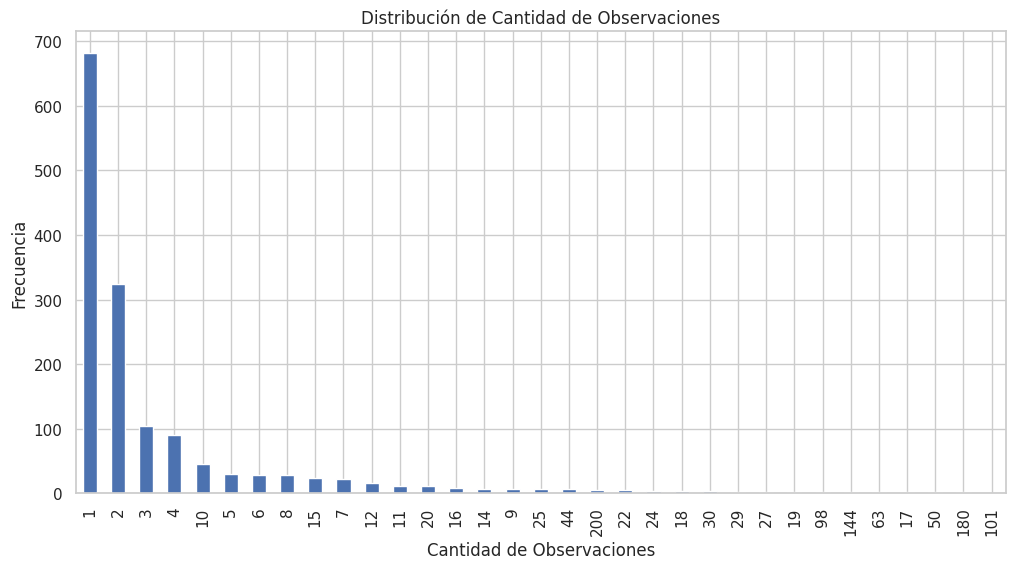

In [27]:
# Visualizar la distribución de la cantidad de observaciones
df['OBSERVATION.COUNT'].value_counts().plot(kind='bar')
plt.title('Distribución de Cantidad de Observaciones')
plt.xlabel('Cantidad de Observaciones')
plt.ylabel('Frecuencia')
plt.show()

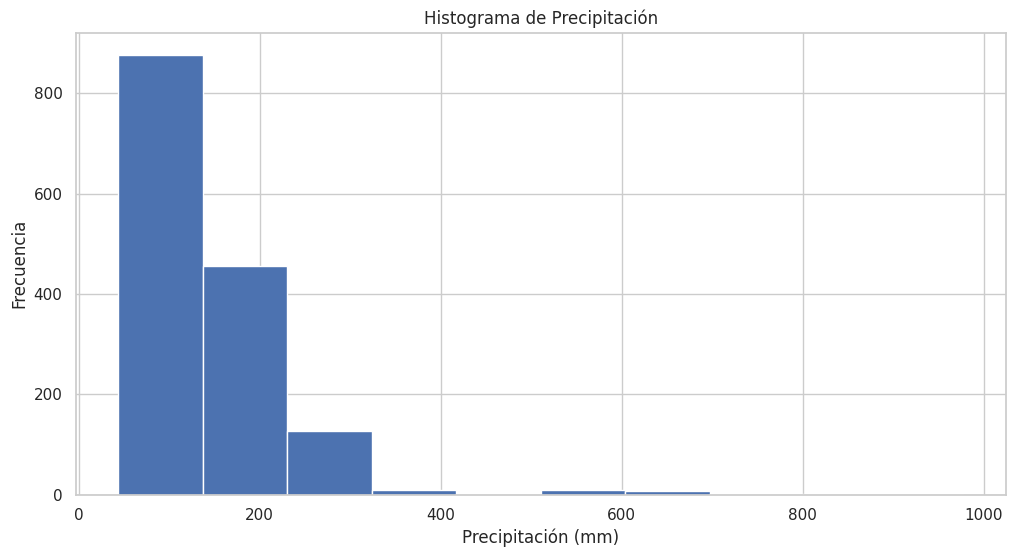

In [28]:
# Visualizar la distribución de la variable PRECIPITATION
df['PRECIPITATION'].hist()
plt.title('Histograma de Precipitación')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
# Evaluar la distribución de las variables clave
print(f"Skewness de PRECIPITATION: {df['PRECIPITATION'].skew()}")

Skewness de PRECIPITATION: 3.592964409327013


El sesgo mide la simetría de la distribución de mis datos. Un sesgo de 0 indicaría que la distribución es perfectamente simétrica. En mi caso, el sesgo positivo de 3.59 significa que la distribución de la precipitación está sesgada hacia la derecha. Esto quiere decir que la cola derecha de la distribución es más larga o está más extendida que la cola izquierda. En otras palabras, hay un número considerable de observaciones con valores de precipitación más altos que el promedio, lo que indica que en algunos meses se registraron precipitaciones inusualmente altas.

In [30]:
print(f"Kurtosis de PRECIPITATION: {df['PRECIPITATION'].kurt()}")

Kurtosis de PRECIPITATION: 21.607628032065495


La curtosis mide la "apuntalidad" de la distribución, es decir, qué tan concentradas están las observaciones en torno a la media. Una curtosis de 3 se considera normal (distribución normal). En mi caso, el valor de 21.61 es extremadamente alto, lo que sugiere que la distribución de la precipitación tiene colas muy largas y un pico muy pronunciado en el centro. Esto implica que hay un número significativo de eventos de precipitación extremos, es decir, la mayoría de los eventos de precipitación se concentran en valores bajos, pero hay algunos eventos con precipitaciones muy altas que están afectando fuertemente la distribución.

# 4. Relación entre variables

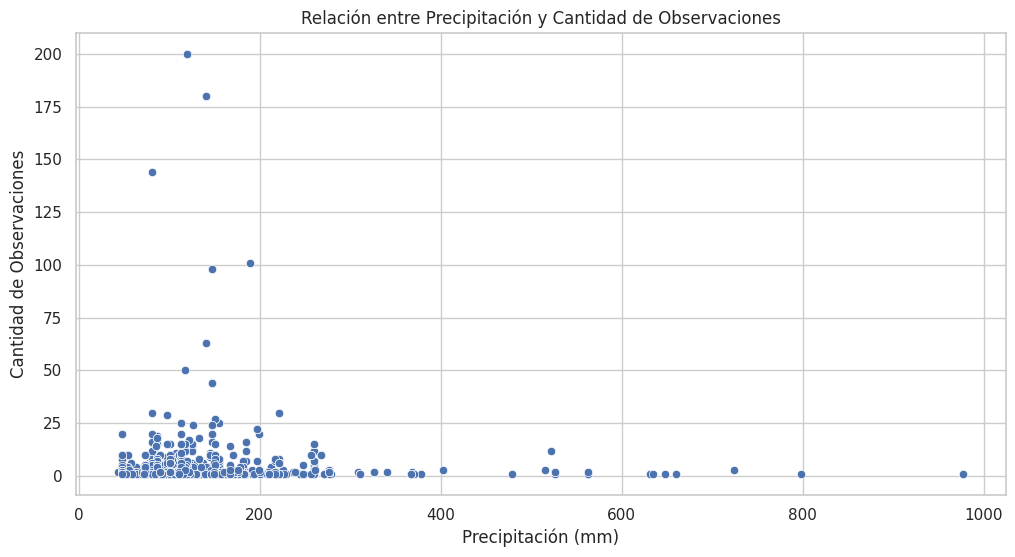

In [31]:
# Gráfico de dispersión para visualizar la relación entre Cantidad de Observaciones y Precipitación
sns.scatterplot(x='PRECIPITATION', y='OBSERVATION.COUNT', data=df)
plt.title('Relación entre Precipitación y Cantidad de Observaciones')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Este gráfico sugiere que, en general, la cantidad de observaciones de la especie Tringa flavipes no aumenta con la precipitación, y podría incluso disminuir a medida que la precipitación aumenta. Sin embargo, la mayoría de las observaciones están concentradas en valores bajos de precipitación, lo que podría indicar que la especie prefiere ambientes menos lluviosos, o que las observaciones son más frecuentes en esos entornos.

# **Intentaré hacer una transformación de los datos.**
Buscando en la literatura, la mejor transformación cuando los datos están sesgados como los míos es la logaritmica

In [32]:
# Aplicar la transformación logarítmica a la precipitación
# Para evitar log(0), se suma un pequeño valor (ejemplo: 1) a los datos antes de aplicar el logaritmo
df['log_PRECIPITATION'] = np.log1p(df['PRECIPITATION'])


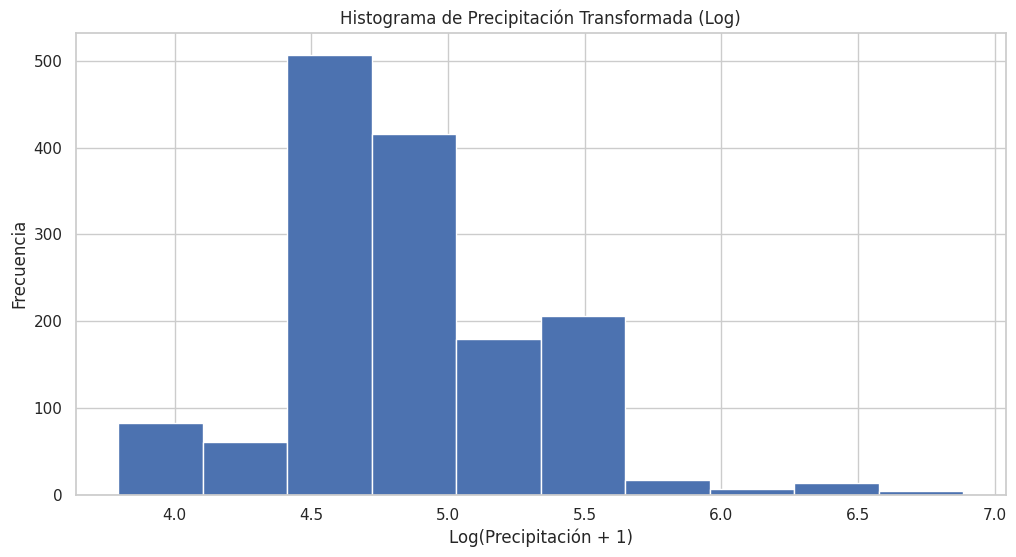

In [33]:
# Visualizar el nuevo histograma de la precipitación transformada
df['log_PRECIPITATION'].hist()
plt.title('Histograma de Precipitación Transformada (Log)')
plt.xlabel('Log(Precipitación + 1)')
plt.ylabel('Frecuencia')
plt.show()

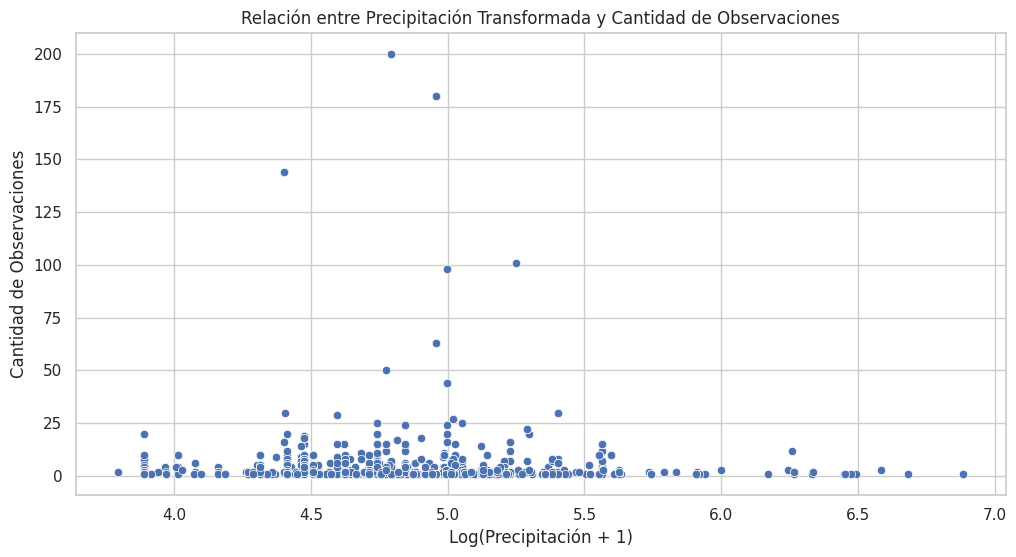

In [34]:
# Repetir el análisis de dispersión con la variable transformada
sns.scatterplot(x='log_PRECIPITATION', y='OBSERVATION.COUNT', data=df)
plt.title('Relación entre Precipitación Transformada y Cantidad de Observaciones')
plt.xlabel('Log(Precipitación + 1)')
plt.ylabel('Cantidad de Observaciones')
plt.show()

La transformación logarítmica ha hecho que la distribución de los datos sea más manejable y ha comprimido los valores de precipitación extremos. Sin embargo, la relación entre la precipitación y la cantidad de observaciones sigue siendo débil, lo que sugiere que otros factores, además de la precipitación, podrían estar influyendo en la cantidad de observaciones de Tringa flavipes. Podría ser útil explorar modelos que incluyan más variables (lo cual lo tengo pensado para el prpyecto final), tener una base de datos mas grande o analizar la relación entre la precipitación y la cantidad de observaciones dentro de diferentes subgrupos o rangos de precipitación.

# **Manejo de valores atípicos**
Antes de conntinuar, haciendo los analisis de la correlación con los datos transformados, quiero intentar manejar los valores atípicos (outliers). Procederé a identificarlos primero.

In [35]:
# Calcular el rango intercuartílico (IQR) para la precipitación
Q1 = df['PRECIPITATION'].quantile(0.25)
Q3 = df['PRECIPITATION'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y contar los valores atípicos
outliers = df[(df['PRECIPITATION'] < lower_bound) | (df['PRECIPITATION'] > upper_bound)]
print(f"Cantidad de valores atípicos: {len(outliers)}")

# Mostrar los valores atípicos identificados
outliers.head()


Cantidad de valores atípicos: 41


,GLOBAL.UNIQUE.IDENTIFIER,COMMON.NAME,SCIENTIFIC.NAME,OBSERVATION.COUNT,COUNTRY,STATE,LOCALITY,LATITUDE,LONGITUDE,OBSERVATION.DATE,PROTOCOL.TYPE,TIME.OBSERVATIONS.STARTED,DURATION.MINUTES,EFFORT.DISTANCE.KM,EFFORT.AREA.HA,NUMBER.OBSERVERS,YEAR,MONTH,PRECIPITATION,log_PRECIPITATION
359,URN:CornellLabOfOrnithology:EBIRD:OBS112645173,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Chocó,"El Almejal, Bahia Solano",6.102542,-77.432370,8/23/2020,Incidental,NaN,NaN,NaN,NaN,6.0,2020,8,631.700012,6.449996
360,URN:CornellLabOfOrnithology:EBIRD:OBS112631900,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Chocó,"El Almejal, Bahia Solano",6.102542,-77.432370,8/23/2020,Historical,NaN,NaN,NaN,NaN,6.0,2020,8,631.700012,6.449996
363,URN:CornellLabOfOrnithology:EBIRD:OBS677252418,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Chocó,Desembocadura de El Valle,6.102000,-77.429870,9/15/2020,Historical,NaN,NaN,NaN,NaN,1.0,2020,9,526.000000,6.267201
364,URN:CornellLabOfOrnithology:EBIRD:OBS272572067,Lesser Yellowlegs,Tringa flavipes,2,Colombia,Chocó,Camino El Valle,6.139360,-77.403402,8/23/2020,Traveling,7:26:00,300.0,5.005,NaN,2.0,2020,8,326.100006,5.790266
365,URN:CornellLabOfOrnithology:EBIRD:OBS272572238,Lesser Yellowlegs,Tringa flavipes,1,Colombia,Chocó,Ecolodge El Almejal--Lodge and Trails,6.112860,-77.435211,8/21/2020,Incidental,12:35:00,NaN,NaN,NaN,2.0,2020,8,631.700012,6.449996


Teniendo en cuenta que solo son 41 valores atípicos voy a intentar transformarlos, estuve buscando y una buena opción despues de hacer transformación logaritmica, es **Winsonorization**.

In [36]:
# Aplicar Winsorization para limitar los valores atípicos
df['PRECIPITATION_WINSORIZED'] = np.where(df['PRECIPITATION'] > upper_bound, upper_bound,
                                          np.where(df['PRECIPITATION'] < lower_bound, lower_bound, df['PRECIPITATION']))

# Verificar los resultados después de Winsorization
df[['PRECIPITATION', 'PRECIPITATION_WINSORIZED']].head()

,PRECIPITATION,PRECIPITATION_WINSORIZED
0,278.799988,278.799988
1,50.500000,50.500000
2,91.800003,91.800003
3,277.100006,277.100006
4,51.700001,51.700001


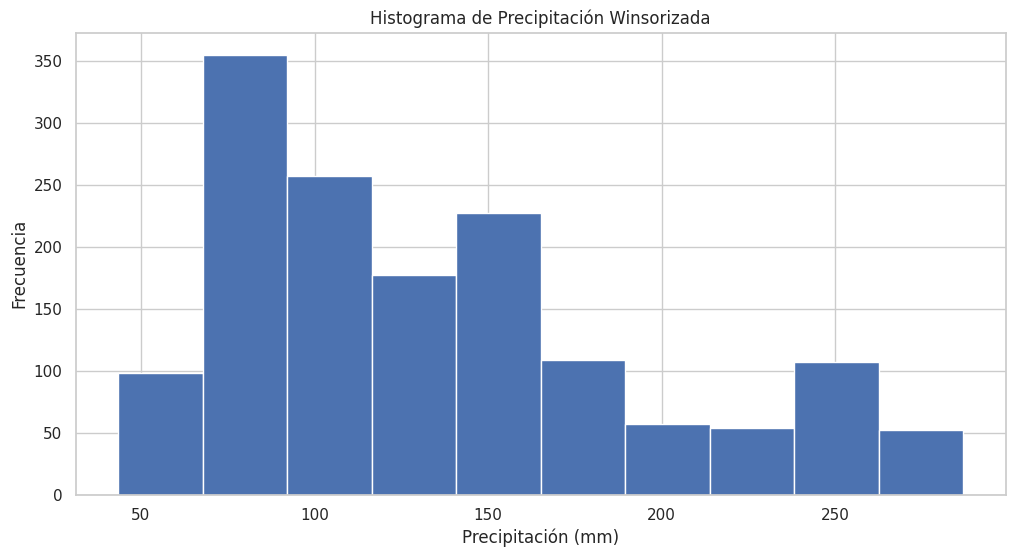

In [37]:
# Histograma de la precipitación después de Winsorization
df['PRECIPITATION_WINSORIZED'].hist()
plt.title('Histograma de Precipitación Winsorizada')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()

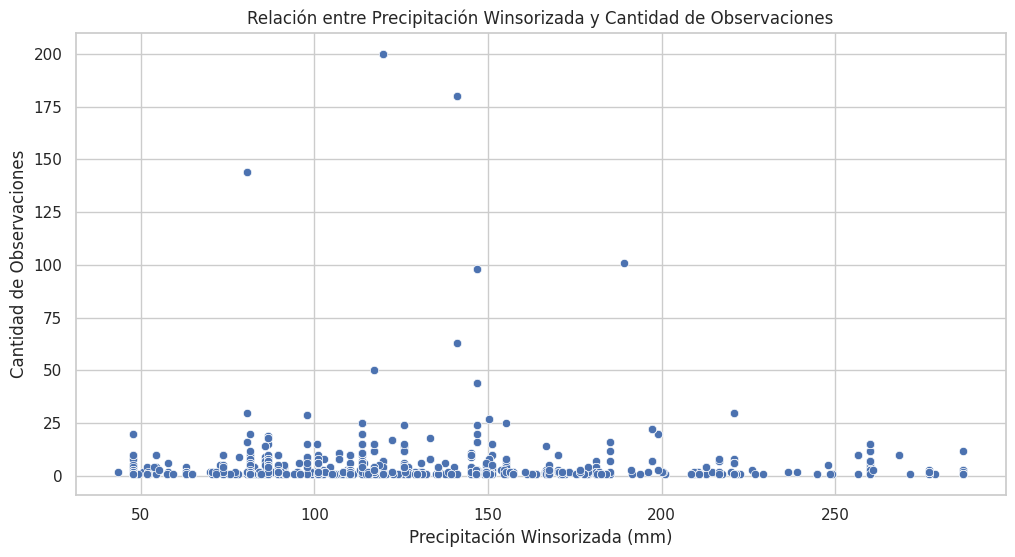

In [38]:
# Gráfico de dispersión usando la precipitación Winsorizada
sns.scatterplot(x='PRECIPITATION_WINSORIZED', y='OBSERVATION.COUNT', data=df)
plt.title('Relación entre Precipitación Winsorizada y Cantidad de Observaciones')
plt.xlabel('Precipitación Winsorizada (mm)')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Recalcular la correlación

In [39]:
# Calcular la correlación entre la precipitación Winsorizada y la cantidad de observaciones
correlation_winsorized = df[['OBSERVATION.COUNT', 'PRECIPITATION_WINSORIZED']].corr()
print(correlation_winsorized)

                          OBSERVATION.COUNT  PRECIPITATION_WINSORIZED
OBSERVATION.COUNT                  1.000000                 -0.017322
PRECIPITATION_WINSORIZED          -0.017322                  1.000000


Incluso de hacer la transformación de los datos y de manejar los outiliers, sigo teniendo una correlación negativa demasiado baja, por lo que quizá la precipitación no es una de las variables que mas influye en los registros de Tringa flavipes, al menos para ese año en particular. Por lo que en un futuro, es recomendable incluir otras variables, quizá uso del suelo (cobertura vegetal o de agua), temperatura, humedad, duración del día, entre otras, para tratar de explicar los registros de esta especie de ave migratoria.